In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import json
import os
from tqdm import tqdm
import pickle

import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, AvgPool2D
from keras.models import Sequential,load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

In [3]:
(len(indoor_label), len(indoor_picture))

(79033, 79033)

In [4]:
(len(station_picture), len(station_label))

(299360, 299360)

In [5]:
(len(indoor_label) + len(station_label))

378393

In [6]:
for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

In [7]:
for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

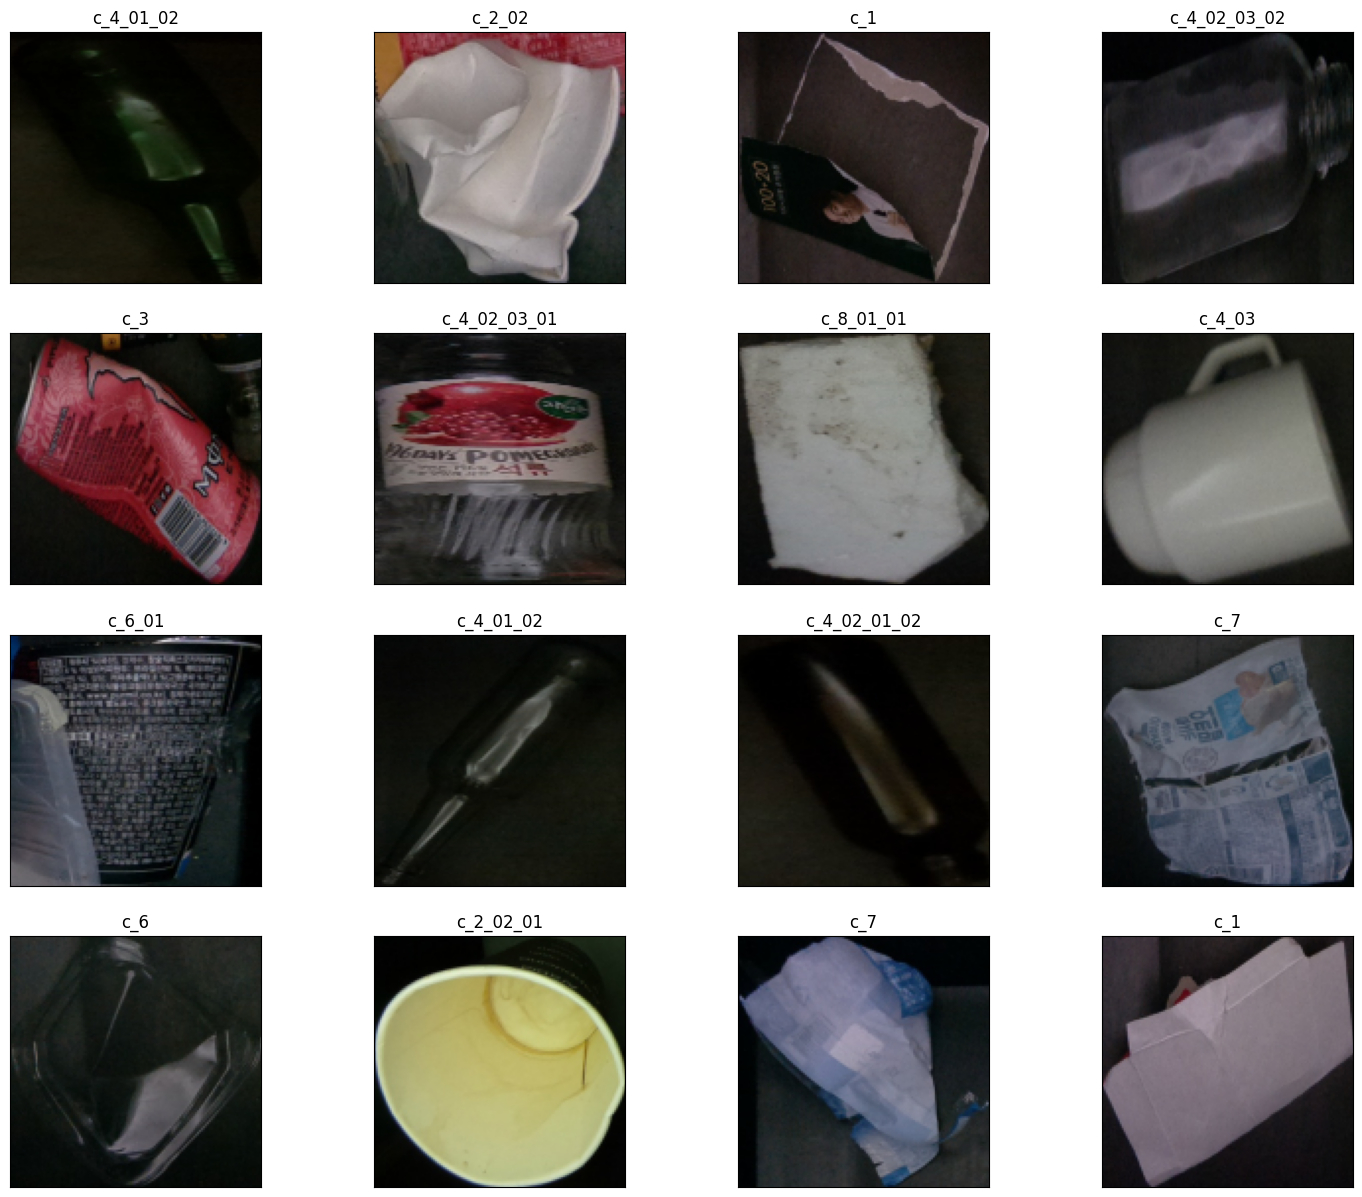

In [8]:
plt.figure(figsize=(18,15))

for num in range(16):
    randomNum = int(np.random.randint(1, 70000, 1))
    plt.subplot(4,4, num+1)
    plt.imshow(cv2.cvtColor(indoor_picture[randomNum], cv2.COLOR_BGR2RGB))
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(indoor_label[randomNum])
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)

In [9]:
label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})

In [10]:
raw_df = pd.concat([label_indoor_df, label_station_df])

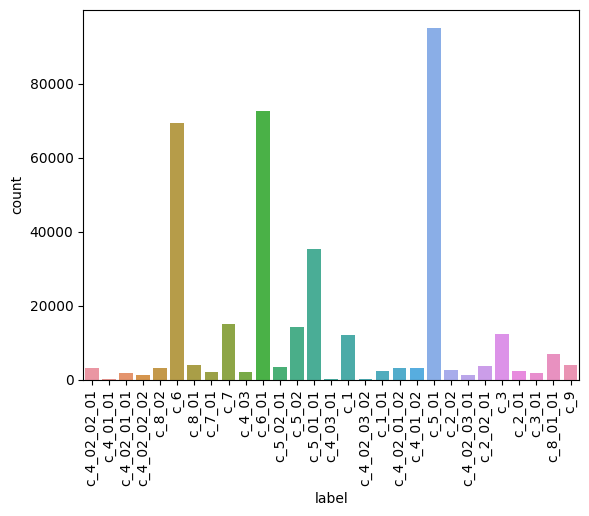

In [11]:
sns.countplot(data=raw_df, x=raw_df["label"]);
plt.xticks(rotation = 90)
plt.show()

In [12]:
del indoor_label
del indoor_picture
del station_label
del station_picture

In [13]:
x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

In [14]:
del raw_df

In [15]:
train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

In [16]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

- 종이 -> 0
- 캔 -> 1
- 유리 -> 2
- 페트 -> 3
- 플라스틱 -> 4
- 비닐 -> 5
- 일반쓰레기 -> 6
- 스티로폼 -> 7
- 배터리 -> 8

In [17]:
train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\array_algos\replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)
C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


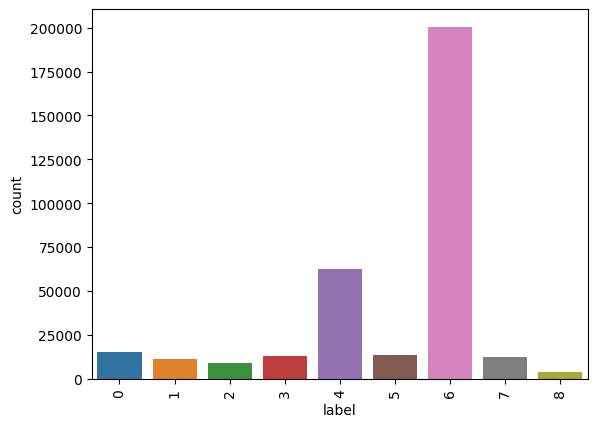

In [18]:
sns.countplot(data=train_df, x=train_df["label"]);
plt.xticks(rotation = 90)
plt.show()

In [19]:
def conv_bn_relu(x, filters, kernel_size, strides):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(tensor, filters):
    x = conv_bn_relu(tensor, filters=filters, kernel_size=1, strides=1)
    x = conv_bn_relu(x, filters=filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4 * filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([tensor, x])
    x = Activation('relu')(x)
    return x

def conv_block(tensor, filters, strides):
    x = conv_bn_relu(tensor, filters=filters, kernel_size=1, strides=strides)
    x = conv_bn_relu(x, filters=filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4 * filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters=4 * filters, kernel_size=1, strides=strides, padding='same')(tensor)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv_bn_relu(inputs, filters=64, kernel_size=7, strides=2)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = conv_block(x, filters=64, strides=1)
    x = identity_block(x, filters=64)
    x = identity_block(x, filters=64)

    x = conv_block(x, filters=128, strides=2)
    x = identity_block(x, filters=128)
    x = identity_block(x, filters=128)
    x = identity_block(x, filters=128)

    x = conv_block(x, filters=256, strides=2)
    x = identity_block(x, filters=256)
    x = identity_block(x, filters=256)
    x = identity_block(x, filters=256)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [20]:
input_shape = (128, 128, 3)
num_classes = 9

model = ResNet(input_shape, num_classes)

lr = 0.003
opt = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

                                                                                                  
 batch_normalization_10 (BatchN  (None, 32, 32, 256)  1024       ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_2 (Add)                    (None, 32, 32, 256)  0           ['activation_6[0][0]',           
                                                                  'batch_normalization_10[0][0]'] 
                                                                                                  
 activation_9 (Activation)      (None, 32, 32, 256)  0           ['add_2[0][0]']                  
                                                                                                  
 conv2d_11 (Conv2D)             (None, 16, 16, 128)  32896       ['activation_9[0][0]']           
          

                                                                                                  
 activation_18 (Activation)     (None, 16, 16, 512)  0           ['add_5[0][0]']                  
                                                                                                  
 conv2d_21 (Conv2D)             (None, 16, 16, 128)  65664       ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_21 (BatchN  (None, 16, 16, 128)  512        ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 16, 16, 128)  0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_22

 ormalization)                                                                                    
                                                                                                  
 activation_28 (Activation)     (None, 8, 8, 256)    0           ['batch_normalization_31[0][0]'] 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 8, 8, 256)    590080      ['activation_28[0][0]']          
                                                                                                  
 batch_normalization_32 (BatchN  (None, 8, 8, 256)   1024        ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_29 (Activation)     (None, 8, 8, 256)    0           ['batch_normalization_32[0][0]'] 
          

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(0, 10000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")


model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_1.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(10000, 20000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_1.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_2.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(20000, 30000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_2.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_3.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(30000, 40000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_3.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_4.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(40000, 50000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_4.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_5.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(50000, 60000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_5.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_6.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(60000, 70000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_6.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_7.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(70000, 80000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_7.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_8.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(80000, 90000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_8.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_9.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(90000, 100000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_9.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_10.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(100000, 110000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_10.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_11.h5")

In [1]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(110000, 120000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_11.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_12.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(120000, 130000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_12.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_13.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(130000, 140000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_13.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_14.h5")

In [ ]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(140000, 150000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_14.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_15.h5")

In [14]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(150000, 160000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_15.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_16.h5")

C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\array_algos\replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)
C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


Epoch 1/5
313/313 [==============================] - 328s 1s/step - loss: 0.6714 - accuracy: 0.7533
Epoch 2/5
313/313 [==============================] - 326s 1s/step - loss: 0.4685 - accuracy: 0.8206
Epoch 3/5
313/313 [==============================] - 325s 1s/step - loss: 0.3587 - accuracy: 0.8639
Epoch 4/5
313/313 [==============================] - 325s 1s/step - loss: 0.2525 - accuracy: 0.9082
Epoch 5/5
313/313 [==============================] - 329s 1s/step - loss: 0.1852 - accuracy: 0.9304


In [2]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(160000, 170000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_16.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_17.h5")

C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\array_algos\replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)
C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6807 - accuracy: 0.7493
Epoch 2/5
313/313 [==============================] - 324s 1s/step - loss: 0.4733 - accuracy: 0.8217
Epoch 3/5
313/313 [==============================] - 323s 1s/step - loss: 0.3374 - accuracy: 0.8752
Epoch 4/5
313/313 [==============================] - 323s 1s/step - loss: 0.2384 - accuracy: 0.9120
Epoch 5/5
313/313 [==============================] - 323s 1s/step - loss: 0.1600 - accuracy: 0.9429


- 시간이 너무 부족해서 결국 노트북에 램 8기가 추가

In [3]:
del x
del y

x = []
y = []

for num in range(170000, 180000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_17.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_18.h5")

Epoch 1/5
313/313 [==============================] - 329s 1s/step - loss: 0.6755 - accuracy: 0.7548
Epoch 2/5
313/313 [==============================] - 323s 1s/step - loss: 0.4470 - accuracy: 0.8323
Epoch 3/5
313/313 [==============================] - 323s 1s/step - loss: 0.3082 - accuracy: 0.8877
Epoch 4/5
313/313 [==============================] - 321s 1s/step - loss: 0.2063 - accuracy: 0.9251
Epoch 5/5
313/313 [==============================] - 309s 988ms/step - loss: 0.1355 - accuracy: 0.9518


In [4]:
del x
del y

x = []
y = []

for num in range(180000, 190000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_18.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_19.h5")

Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6705 - accuracy: 0.7547
Epoch 2/5
313/313 [==============================] - 324s 1s/step - loss: 0.4389 - accuracy: 0.8314
Epoch 3/5
313/313 [==============================] - 324s 1s/step - loss: 0.3014 - accuracy: 0.8891
Epoch 4/5
313/313 [==============================] - 324s 1s/step - loss: 0.1842 - accuracy: 0.9354
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.1432 - accuracy: 0.9512


In [5]:
del x
del y

x = []
y = []

for num in range(190000, 200000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_19.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_20.h5")

Epoch 1/5
313/313 [==============================] - 326s 1s/step - loss: 0.6678 - accuracy: 0.7570
Epoch 2/5
313/313 [==============================] - 323s 1s/step - loss: 0.4476 - accuracy: 0.8270
Epoch 3/5
313/313 [==============================] - 324s 1s/step - loss: 0.3013 - accuracy: 0.8885
Epoch 4/5
313/313 [==============================] - 324s 1s/step - loss: 0.1993 - accuracy: 0.9290
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.1282 - accuracy: 0.9563


In [6]:
del x
del y

x = []
y = []

for num in range(200000, 210000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_20.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_21.h5")

Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6833 - accuracy: 0.7482
Epoch 2/5
313/313 [==============================] - 325s 1s/step - loss: 0.4453 - accuracy: 0.8280
Epoch 3/5
313/313 [==============================] - 323s 1s/step - loss: 0.2933 - accuracy: 0.8939
Epoch 4/5
313/313 [==============================] - 323s 1s/step - loss: 0.1858 - accuracy: 0.9335
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.1128 - accuracy: 0.9611


In [7]:
del x
del y

x = []
y = []

for num in range(210000, 220000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_21.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_22.h5")

Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6715 - accuracy: 0.7551
Epoch 2/5
313/313 [==============================] - 323s 1s/step - loss: 0.4276 - accuracy: 0.8346
Epoch 3/5
313/313 [==============================] - 323s 1s/step - loss: 0.2697 - accuracy: 0.9032
Epoch 4/5
313/313 [==============================] - 323s 1s/step - loss: 0.1601 - accuracy: 0.9455
Epoch 5/5
313/313 [==============================] - 323s 1s/step - loss: 0.0993 - accuracy: 0.9669


In [8]:
del x
del y

x = []
y = []

for num in range(220000, 230000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_22.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_23.h5")

Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6763 - accuracy: 0.7523
Epoch 2/5
313/313 [==============================] - 324s 1s/step - loss: 0.4293 - accuracy: 0.8373
Epoch 3/5
313/313 [==============================] - 323s 1s/step - loss: 0.2882 - accuracy: 0.8951
Epoch 4/5
313/313 [==============================] - 323s 1s/step - loss: 0.1697 - accuracy: 0.9409
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.1132 - accuracy: 0.9607


In [10]:
del x
del y

x = []
y = []

for num in range(230000, 240000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_23.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_24.h5")

Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6888 - accuracy: 0.7532
Epoch 2/5
313/313 [==============================] - 323s 1s/step - loss: 0.4266 - accuracy: 0.8415
Epoch 3/5
313/313 [==============================] - 324s 1s/step - loss: 0.2788 - accuracy: 0.8971
Epoch 4/5
313/313 [==============================] - 323s 1s/step - loss: 0.1547 - accuracy: 0.9469
Epoch 5/5
313/313 [==============================] - 323s 1s/step - loss: 0.1175 - accuracy: 0.9611


In [11]:
del x
del y

x = []
y = []

for num in range(240000, 250000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_24.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_25.h5")

Epoch 1/5
313/313 [==============================] - 347s 1s/step - loss: 0.6690 - accuracy: 0.7587
Epoch 2/5
313/313 [==============================] - 345s 1s/step - loss: 0.4108 - accuracy: 0.8473
Epoch 3/5
313/313 [==============================] - 345s 1s/step - loss: 0.2729 - accuracy: 0.8978
Epoch 4/5
313/313 [==============================] - 347s 1s/step - loss: 0.1456 - accuracy: 0.9500
Epoch 5/5
313/313 [==============================] - 346s 1s/step - loss: 0.0989 - accuracy: 0.9686


In [12]:
del x
del y

x = []
y = []

for num in range(250000, 260000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_25.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_26.h5")

Epoch 1/5
313/313 [==============================] - 337s 1s/step - loss: 0.6559 - accuracy: 0.7601
Epoch 2/5
313/313 [==============================] - 336s 1s/step - loss: 0.3908 - accuracy: 0.8508
Epoch 3/5
313/313 [==============================] - 336s 1s/step - loss: 0.2283 - accuracy: 0.9185
Epoch 4/5
313/313 [==============================] - 336s 1s/step - loss: 0.1312 - accuracy: 0.9558
Epoch 5/5
313/313 [==============================] - 335s 1s/step - loss: 0.0900 - accuracy: 0.9706


In [13]:
del x
del y

x = []
y = []

for num in range(260000, 270000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_26.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_27.h5")

Epoch 1/5
313/313 [==============================] - 330s 1s/step - loss: 0.6656 - accuracy: 0.7505
Epoch 2/5
313/313 [==============================] - 329s 1s/step - loss: 0.4035 - accuracy: 0.8456
Epoch 3/5
313/313 [==============================] - 329s 1s/step - loss: 0.2331 - accuracy: 0.9149
Epoch 4/5
313/313 [==============================] - 329s 1s/step - loss: 0.1257 - accuracy: 0.9561
Epoch 5/5
313/313 [==============================] - 329s 1s/step - loss: 0.0876 - accuracy: 0.9702


In [14]:
del x
del y

x = []
y = []

for num in range(270000, 280000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_27.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_28.h5")

Epoch 1/5
313/313 [==============================] - 332s 1s/step - loss: 0.6648 - accuracy: 0.7643
Epoch 2/5
313/313 [==============================] - 330s 1s/step - loss: 0.4079 - accuracy: 0.8468
Epoch 3/5
313/313 [==============================] - 329s 1s/step - loss: 0.2370 - accuracy: 0.9132
Epoch 4/5
313/313 [==============================] - 330s 1s/step - loss: 0.1301 - accuracy: 0.9562
Epoch 5/5
313/313 [==============================] - 330s 1s/step - loss: 0.0810 - accuracy: 0.9743


In [15]:
del x
del y

x = []
y = []

for num in range(280000, 290000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_28.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_29.h5")

Epoch 1/5
313/313 [==============================] - 326s 1s/step - loss: 0.6715 - accuracy: 0.7527
Epoch 2/5
313/313 [==============================] - 325s 1s/step - loss: 0.3962 - accuracy: 0.8483
Epoch 3/5
313/313 [==============================] - 325s 1s/step - loss: 0.2388 - accuracy: 0.9159
Epoch 4/5
313/313 [==============================] - 325s 1s/step - loss: 0.1290 - accuracy: 0.9569
Epoch 5/5
313/313 [==============================] - 325s 1s/step - loss: 0.0908 - accuracy: 0.9694


In [16]:
del x
del y

x = []
y = []

for num in range(290000, 300000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_29.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_30.h5")

Epoch 1/5
313/313 [==============================] - 326s 1s/step - loss: 0.6685 - accuracy: 0.7585
Epoch 2/5
313/313 [==============================] - 324s 1s/step - loss: 0.4002 - accuracy: 0.8505
Epoch 3/5
313/313 [==============================] - 324s 1s/step - loss: 0.2292 - accuracy: 0.9175
Epoch 4/5
313/313 [==============================] - 324s 1s/step - loss: 0.1264 - accuracy: 0.9604
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.0827 - accuracy: 0.9744


In [2]:
#Pickle 데이터 불러오기
with open('./data/train_label_indoor.pickle', 'rb') as f:
    indoor_label = pickle.load(f)

with open('./data/train_picture_indoor.pickle', 'rb') as f:
    indoor_picture = pickle.load(f)

with open('./data/train_label_station.pickle', 'rb') as f:
    station_label = pickle.load(f)
    
with open('./data/train_picture_station.pickle', 'rb') as f:
    station_picture = pickle.load(f)

for num in range(len(indoor_picture)):
    indoor_picture[num] = indoor_picture[num].reshape(128, 128, 3)

for num in range(len(station_picture)):
    station_picture[num] = station_picture[num].reshape(128, 128, 3)

label_indoor_df = pd.DataFrame({
    "picture" : indoor_picture,
    "label" : indoor_label
})

label_station_df = pd.DataFrame({
    "picture" : station_picture,
    "label" : station_label 
})
raw_df = pd.concat([label_indoor_df, label_station_df])

del indoor_label
del indoor_picture
del station_label
del station_picture

x_train, x_val, y_train, y_val = train_test_split(raw_df['picture'], raw_df['label'], test_size=0.1, stratify=raw_df['label'],
                                                 random_state=13)

del raw_df

train_df = pd.DataFrame({
    "picture" : x_train,
    "label" : y_train
})

val_df = pd.DataFrame({
    "picture" : x_val,
    "label" : y_val
})

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)


train_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
train_df.replace('c_3', 1, inplace=True)
train_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
train_df.replace("c_5_02", 3, inplace=True)
train_df.replace('c_6', 4, inplace=True)
train_df.replace('c_7', 5, inplace=True)
train_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
train_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
train_df.replace('c_9', 8, inplace=True)

val_df.replace(['c_1', 'c_2_01', 'c_2_02'], [0,0,0], inplace=True)
val_df.replace('c_3', 1, inplace=True)
val_df.replace(['c_4_01_02','c_4_02_01_02','c_4_02_02_02','c_4_02_03_02','c_4_03'], [2,2,2,2,2], inplace=True)
val_df.replace("c_5_02", 3, inplace=True)
val_df.replace('c_6', 4, inplace=True)
val_df.replace('c_7', 5, inplace=True)
val_df.replace(["c_1_01","c_2_02_01","c_3_01","c_4_03_01","c_5_01_01","c_5_02_01","c_6_01","c_7_01","c_4_01_01","c_4_02_01_01","c_4_02_02_01","c_4_02_03_01","c_5_01"], [6,6,6,6,6,6,6,6,6,6,6,6,6], inplace=True)
val_df.replace(['c_8_01', 'c_8_02', 'c_8_01_01'], [7,7,7], inplace=True)
val_df.replace('c_9', 8, inplace=True)

x = []
y = []

for num in range(300000, 310000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_30.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_31.h5")

C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\array_algos\replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)
C:\Users\super\miniconda3\envs\ds_study\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


Epoch 1/5
313/313 [==============================] - 330s 1s/step - loss: 0.6615 - accuracy: 0.7517
Epoch 2/5
313/313 [==============================] - 326s 1s/step - loss: 0.3916 - accuracy: 0.8518
Epoch 3/5
313/313 [==============================] - 327s 1s/step - loss: 0.2211 - accuracy: 0.9203
Epoch 4/5
313/313 [==============================] - 325s 1s/step - loss: 0.1241 - accuracy: 0.9592
Epoch 5/5
313/313 [==============================] - 326s 1s/step - loss: 0.0739 - accuracy: 0.9769


In [3]:
del x
del y

x = []
y = []

for num in range(310000, 320000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_31.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_32.h5")

Epoch 1/5
313/313 [==============================] - 325s 1s/step - loss: 0.6734 - accuracy: 0.7520
Epoch 2/5
313/313 [==============================] - 323s 1s/step - loss: 0.3923 - accuracy: 0.8518
Epoch 3/5
313/313 [==============================] - 324s 1s/step - loss: 0.2232 - accuracy: 0.9203
Epoch 4/5
313/313 [==============================] - 323s 1s/step - loss: 0.1246 - accuracy: 0.9604
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.0756 - accuracy: 0.9766


In [4]:
del x
del y

x = []
y = []

for num in range(320000, 330000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_32.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_33.h5")

Epoch 1/5
313/313 [==============================] - 327s 1s/step - loss: 0.6644 - accuracy: 0.7573
Epoch 2/5
313/313 [==============================] - 327s 1s/step - loss: 0.3800 - accuracy: 0.8587
Epoch 3/5
313/313 [==============================] - 326s 1s/step - loss: 0.2110 - accuracy: 0.9242
Epoch 4/5
313/313 [==============================] - 326s 1s/step - loss: 0.1080 - accuracy: 0.9651
Epoch 5/5
313/313 [==============================] - 326s 1s/step - loss: 0.0829 - accuracy: 0.9737


In [5]:
del x
del y

x = []
y = []

for num in range(330000, 340000):
    data = train_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)
    y = tf.constant(y)
else:
    print("label out")

model = load_model("./model_data/recycling classification_33.h5")
model.fit(x,y,batch_size=32, epochs=5)
model.save("./model_data/recycling classification_34.h5")

Epoch 1/5
313/313 [==============================] - 326s 1s/step - loss: 0.6509 - accuracy: 0.7658
Epoch 2/5
313/313 [==============================] - 324s 1s/step - loss: 0.3797 - accuracy: 0.8578
Epoch 3/5
313/313 [==============================] - 324s 1s/step - loss: 0.2054 - accuracy: 0.9277
Epoch 4/5
313/313 [==============================] - 324s 1s/step - loss: 0.1070 - accuracy: 0.9658
Epoch 5/5
313/313 [==============================] - 324s 1s/step - loss: 0.0757 - accuracy: 0.9776


In [6]:
del x
del y

In [7]:
len(train_df), len(val_df)

(340553, 37840)

In [8]:
x = []
y = []

for num in range(len(val_df)):
    data = val_df.iloc[num,]
    x.append(data['picture'])
    y.append(data['label'])
if len(set(y)) == 9:
    x = tf.constant(x)

In [9]:
os.listdir("./model_data/")

['recycling classification_15.h5',
 'recycling classification_16.h5',
 'recycling classification_17.h5',
 'recycling classification_18.h5',
 'recycling classification_19.h5',
 'recycling classification_20.h5',
 'recycling classification_21.h5',
 'recycling classification_22.h5',
 'recycling classification_23.h5',
 'recycling classification_24.h5',
 'recycling classification_25.h5',
 'recycling classification_26.h5',
 'recycling classification_27.h5',
 'recycling classification_28.h5',
 'recycling classification_29.h5',
 'recycling classification_30.h5',
 'recycling classification_31.h5',
 'recycling classification_32.h5',
 'recycling classification_33.h5',
 'recycling classification_34.h5']

In [43]:
path = './model_data/'
accuracy_list = []

for num in tqdm(range(1, 35)):
    num_str = str(num)
    model = load_model(path+'recycling classification_'+ num_str +'.h5')
    
    pred = model.predict(x)
    pred =np.argmax(pred, axis=1)
    accuracy = accuracy_score(y, pred)
    accuracy_list.append(accuracy)
    print(str(num) + "번째 모델 정확도 : ", accuracy)

  0%|                                                                                           | 0/34 [00:00<?, ?it/s]

1183/1183 [==============================] - 331s 280ms/step


  3%|██▎                                                                             | 1/34 [05:32<3:02:52, 332.49s/it]

1번째 모델 정확도 :  0.5761627906976744
1183/1183 [==============================] - 331s 280ms/step


  6%|████▋                                                                           | 2/34 [11:04<2:57:19, 332.49s/it]

2번째 모델 정확도 :  0.6078488372093023
1183/1183 [==============================] - 332s 280ms/step


  9%|███████                                                                         | 3/34 [16:37<2:51:53, 332.70s/it]

3번째 모델 정확도 :  0.6521670190274842
1183/1183 [==============================] - 336s 284ms/step


 12%|█████████▍                                                                      | 4/34 [22:15<2:47:16, 334.56s/it]

4번째 모델 정확도 :  0.7074524312896406
1183/1183 [==============================] - 334s 282ms/step


 15%|███████████▊                                                                    | 5/34 [27:50<2:41:48, 334.77s/it]

5번째 모델 정확도 :  0.6759778012684989
1183/1183 [==============================] - 335s 283ms/step


 18%|██████████████                                                                  | 6/34 [33:26<2:36:30, 335.36s/it]

6번째 모델 정확도 :  0.7255285412262157
1183/1183 [==============================] - 330s 279ms/step


 21%|████████████████▍                                                               | 7/34 [38:58<2:30:20, 334.10s/it]

7번째 모델 정확도 :  0.7223308668076109
1183/1183 [==============================] - 329s 278ms/step


 24%|██████████████████▊                                                             | 8/34 [44:28<2:24:14, 332.87s/it]

8번째 모델 정확도 :  0.7376321353065539
1183/1183 [==============================] - 330s 279ms/step


 26%|█████████████████████▏                                                          | 9/34 [50:00<2:18:32, 332.49s/it]

9번째 모델 정확도 :  0.7260570824524313
1183/1183 [==============================] - 331s 279ms/step


 29%|███████████████████████▏                                                       | 10/34 [55:32<2:12:56, 332.35s/it]

10번째 모델 정확도 :  0.7419133192389006
1183/1183 [==============================] - 342s 289ms/step


 32%|████████████████████████▉                                                    | 11/34 [1:01:17<2:08:53, 336.25s/it]

11번째 모델 정확도 :  0.7276162790697674
1183/1183 [==============================] - 337s 285ms/step


 35%|███████████████████████████▏                                                 | 12/34 [1:06:56<2:03:33, 336.98s/it]

12번째 모델 정확도 :  0.6952167019027484
1183/1183 [==============================] - 350s 295ms/step


 38%|█████████████████████████████▍                                               | 13/34 [1:12:47<1:59:26, 341.26s/it]

13번째 모델 정확도 :  0.7282241014799155
1183/1183 [==============================] - 336s 283ms/step


 41%|███████████████████████████████▋                                             | 14/34 [1:18:24<1:53:20, 340.00s/it]

14번째 모델 정확도 :  0.7370771670190275
1183/1183 [==============================] - 341s 288ms/step


 44%|█████████████████████████████████▉                                           | 15/34 [1:24:07<1:47:56, 340.86s/it]

15번째 모델 정확도 :  0.7257399577167019
1183/1183 [==============================] - 339s 286ms/step


 47%|████████████████████████████████████▏                                        | 16/34 [1:29:47<1:42:13, 340.75s/it]

16번째 모델 정확도 :  0.7090380549682875
1183/1183 [==============================] - 337s 284ms/step


 50%|██████████████████████████████████████▌                                      | 17/34 [1:35:25<1:36:18, 339.94s/it]

17번째 모델 정확도 :  0.7131871035940803
1183/1183 [==============================] - 336s 283ms/step


 53%|████████████████████████████████████████▊                                    | 18/34 [1:41:02<1:30:25, 339.08s/it]

18번째 모델 정확도 :  0.7125264270613108
1183/1183 [==============================] - 331s 280ms/step


 56%|███████████████████████████████████████████                                  | 19/34 [1:46:35<1:24:16, 337.11s/it]

19번째 모델 정확도 :  0.7111786469344609
1183/1183 [==============================] - 330s 279ms/step


 59%|█████████████████████████████████████████████▎                               | 20/34 [1:52:06<1:18:15, 335.39s/it]

20번째 모델 정확도 :  0.7480443974630021
1183/1183 [==============================] - 332s 280ms/step


 62%|███████████████████████████████████████████████▌                             | 21/34 [1:57:40<1:12:32, 334.82s/it]

21번째 모델 정확도 :  0.7538054968287526
1183/1183 [==============================] - 330s 279ms/step


 65%|█████████████████████████████████████████████████▊                           | 22/34 [2:03:12<1:06:46, 333.91s/it]

22번째 모델 정확도 :  0.7466173361522199
1183/1183 [==============================] - 330s 279ms/step


 68%|████████████████████████████████████████████████████                         | 23/34 [2:08:43<1:01:05, 333.20s/it]

23번째 모델 정확도 :  0.74392177589852
1183/1183 [==============================] - 329s 278ms/step


 71%|███████████████████████████████████████████████████████▊                       | 24/34 [2:14:13<55:23, 332.33s/it]

24번째 모델 정확도 :  0.7353858350951374
1183/1183 [==============================] - 331s 279ms/step


 74%|██████████████████████████████████████████████████████████                     | 25/34 [2:19:45<49:49, 332.19s/it]

25번째 모델 정확도 :  0.6994186046511628
1183/1183 [==============================] - 329s 278ms/step


 76%|████████████████████████████████████████████████████████████▍                  | 26/34 [2:25:16<44:13, 331.73s/it]

26번째 모델 정확도 :  0.7441860465116279
1183/1183 [==============================] - 328s 277ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 27/34 [2:30:46<38:37, 331.14s/it]

27번째 모델 정확도 :  0.7547832980972515
1183/1183 [==============================] - 331s 279ms/step


 82%|█████████████████████████████████████████████████████████████████              | 28/34 [2:36:18<33:08, 331.48s/it]

28번째 모델 정확도 :  0.763715644820296
1183/1183 [==============================] - 329s 278ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 29/34 [2:41:48<27:35, 331.08s/it]

29번째 모델 정확도 :  0.7204016913319239
1183/1183 [==============================] - 432s 365ms/step


 88%|█████████████████████████████████████████████████████████████████████▋         | 30/34 [2:49:03<24:08, 362.24s/it]

30번째 모델 정확도 :  0.7531712473572939
1183/1183 [==============================] - 400s 338ms/step


 91%|████████████████████████████████████████████████████████████████████████       | 31/34 [2:55:45<18:42, 374.10s/it]

31번째 모델 정확도 :  0.743076109936575
1183/1183 [==============================] - 387s 327ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 32/34 [3:02:13<12:36, 378.38s/it]

32번째 모델 정확도 :  0.7620243128964059
1183/1183 [==============================] - 375s 317ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 33/34 [3:08:30<06:17, 377.88s/it]

33번째 모델 정확도 :  0.7575052854122621
1183/1183 [==============================] - 369s 311ms/step


100%|███████████████████████████████████████████████████████████████████████████████| 34/34 [3:14:40<00:00, 343.54s/it]

34번째 모델 정확도 :  0.7594080338266385


In [61]:
train_accuracy_epoch5 = [0.6569,
                         0.6860,
                         0.7095,
                         0.7169,
                         0.7482,
                         0.7827,
                         0.8044,
                         0.8260,
                         0.8629,
                         0.8741,
                         0.8862,
                         0.8961,
                         0.9208,
                         0.9356,
                         0.9344,
                         0.9304,
                         0.9429,
                         0.9518,
                         0.9512,
                         0.9563,
                         0.9611,
                         0.9669,
                         0.9607,
                         0.9611,
                         0.9686,
                         0.9706,
                         0.9702,
                         0.9743,
                         0.9694,
                         0.9744,
                         0.9769,
                         0.9766,
                         0.9737,
                         0.9776]

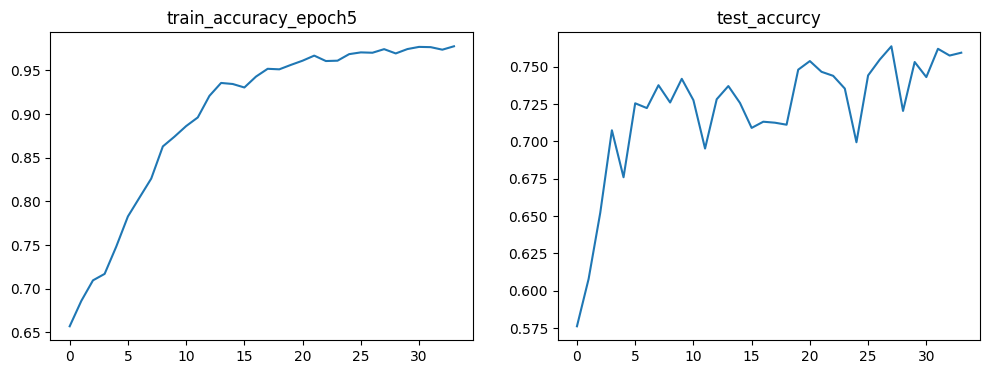

In [63]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(train_accuracy_epoch5)
ax1.set_title("train_accuracy_epoch5")

ax2.plot(accuracy_list)
ax2.set_title("test_accurcy")

plt.show()

In [69]:
print(accuracy_list.index(max(accuracy_list))+1)

28


In [70]:
model = load_model("./model_data/recycling classification_28.h5")

In [71]:
pred = model.predict(x)

1183/1183 [==============================] - 456s 385ms/step


In [72]:
pred = np.argmax(pred, axis=1)

In [74]:
print(accuracy_score(y,pred))

0.763715644820296


In [75]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1683
           1       0.73      0.59      0.65      1240
           2       0.89      0.96      0.92       991
           3       0.51      0.41      0.46      1418
           4       0.63      0.61      0.62      6928
           5       0.63      0.38      0.48      1501
           6       0.82      0.86      0.84     22275
           7       0.74      0.82      0.77      1397
           8       0.85      0.88      0.87       407

    accuracy                           0.76     37840
   macro avg       0.72      0.68      0.70     37840
weighted avg       0.76      0.76      0.76     37840



In [76]:
print(confusion_matrix(y, pred))

[[ 1088    30     1     0    52   105   376    29     2]
 [   25   728     2     5    50    16   403     2     9]
 [    3     0   948     0    17     1    16     6     0]
 [    0     1     3   588   280     4   541     1     0]
 [   56    32    53   241  4245    58  2124    97    22]
 [  170    32     4     8   135   571   549    23     9]
 [  235   168    49   302  1874   144 19231   250    22]
 [   31     3     3     0    29     2   189  1140     0]
 [    1     7     0     1     9     2    27     0   360]]


In [77]:
# 학습된 모델 로드
model_list = ["./model_data/recycling classification_28.h5",
              "./model_data/recycling classification_32.h5",
               "./model_data/recycling classification_33.h5",
               "./model_data/recycling classification_34.h5",]

# 앙상블 예측
ensemble_predictions = []
for model_name in model_list:
    model = load_model(model_name)
    predictions = model.predict(x)
    ensemble_predictions.append(predictions)

# 앙상블 결과 평균 계산
ensemble_predictions = np.array(ensemble_predictions)
final_predictions = np.mean(ensemble_predictions, axis=0)

1183/1183 [==============================] - 331s 279ms/step


In [83]:
final_predictions = np.argmax(final_predictions, axis=1)

In [86]:
print(accuracy_score(y,final_predictions))
print(classification_report(y, final_predictions))
print(confusion_matrix(y, final_predictions))

0.7968816067653277
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1683
           1       0.84      0.59      0.69      1240
           2       0.96      0.94      0.95       991
           3       0.64      0.46      0.54      1418
           4       0.69      0.65      0.67      6928
           5       0.70      0.48      0.57      1501
           6       0.83      0.90      0.86     22275
           7       0.81      0.83      0.82      1397
           8       0.94      0.86      0.90       407

    accuracy                           0.80     37840
   macro avg       0.80      0.71      0.75     37840
weighted avg       0.79      0.80      0.79     37840

[[ 1126    13     3     0    46   121   346    27     1]
 [   21   731     0     2    35    26   422     1     2]
 [    1     0   934     1    21     1    19    14     0]
 [    0     3     0   658   241     2   513     1     0]
 [   37    19    12   153  4533    46  2060    5

- 종이 -> 0
- 캔 -> 1
- 유리 -> 2
- 페트 -> 3
- 플라스틱 -> 4
- 비닐 -> 5
- 일반쓰레기 -> 6
- 스티로폼 -> 7
- 배터리 -> 8